# First cell (change to Markdown type):
# House Price Analysis

In this notebook, we'll analyze the relationship between house prices and various features, starting with:
- Above grade living area (GrLivArea)
- First floor square feet (1stFlrSF)

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_theme(style='whitegrid')  # Using seaborn's built-in theme instead
sns.set_palette('husl')

In [7]:
# Third cell:
# Load the data
df = pd.read_csv('data/train.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (1460, 81)

First few rows:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Fourth cell (change to Markdown type):
## Scatter Plots of House Prices vs Selected Features

Let's create scatter plots to visualize the relationship between house prices and:
1. Above grade living area
2. First floor square feet

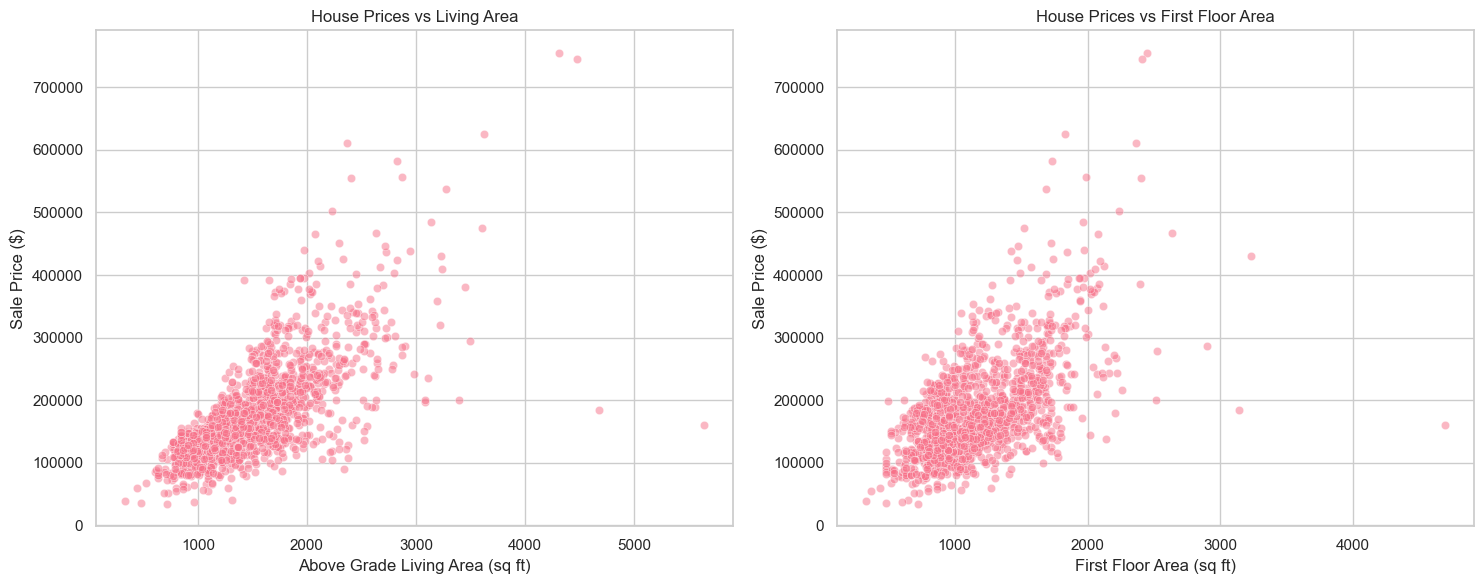

In [3]:
# Fifth cell:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: SalePrice vs GrLivArea
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', alpha=0.5, ax=ax1)
ax1.set_title('House Prices vs Living Area')
ax1.set_xlabel('Above Grade Living Area (sq ft)')
ax1.set_ylabel('Sale Price ($)')

# Plot 2: SalePrice vs 1stFlrSF
sns.scatterplot(data=df, x='1stFlrSF', y='SalePrice', alpha=0.5, ax=ax2)
ax2.set_title('House Prices vs First Floor Area')
ax2.set_xlabel('First Floor Area (sq ft)')
ax2.set_ylabel('Sale Price ($)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Top 3 Most Expensive Neighborhoods:
                     mean  count          std
Neighborhood                                 
NoRidge       $335,295.32     41  $121,412.66
NridgHt       $316,270.62     77   $96,392.54
StoneBr       $310,499.00     25  $112,969.68

Bottom 3 Least Expensive Neighborhoods:
                     mean  count         std
Neighborhood                                
BrDale        $104,493.75     16  $14,330.18
IDOTRR        $100,123.78     37  $33,376.71
MeadowV        $98,576.47     17  $23,491.05


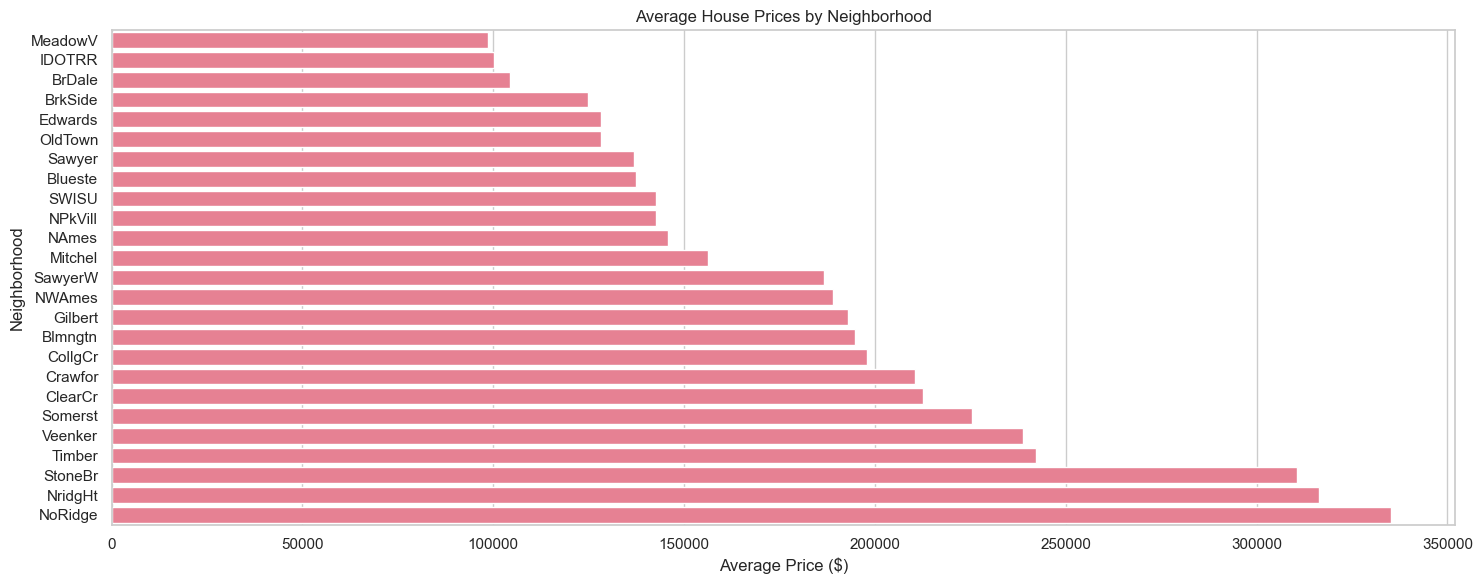

In [4]:
# Calculate average price per neighborhood
neighborhood_prices = df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'count', 'std']).round(2)
neighborhood_prices = neighborhood_prices.sort_values('mean', ascending=False)

# Add formatting for better readability
neighborhood_prices['mean'] = neighborhood_prices['mean'].apply(lambda x: f'${x:,.2f}')
neighborhood_prices['std'] = neighborhood_prices['std'].apply(lambda x: f'${x:,.2f}')

# Display top 3 and bottom 3 neighborhoods
print("Top 3 Most Expensive Neighborhoods:")
print(neighborhood_prices.head(3))
print("\nBottom 3 Least Expensive Neighborhoods:")
print(neighborhood_prices.tail(3))

# Create a bar plot of average prices by neighborhood
plt.figure(figsize=(15, 6))
# Convert price strings back to numbers for plotting
prices_for_plot = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=True)
sns.barplot(x=prices_for_plot.values, y=prices_for_plot.index)
plt.title('Average House Prices by Neighborhood')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

C:\Users\adminarto\AppData\Local\Temp\ipykernel_10900\2334575109.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


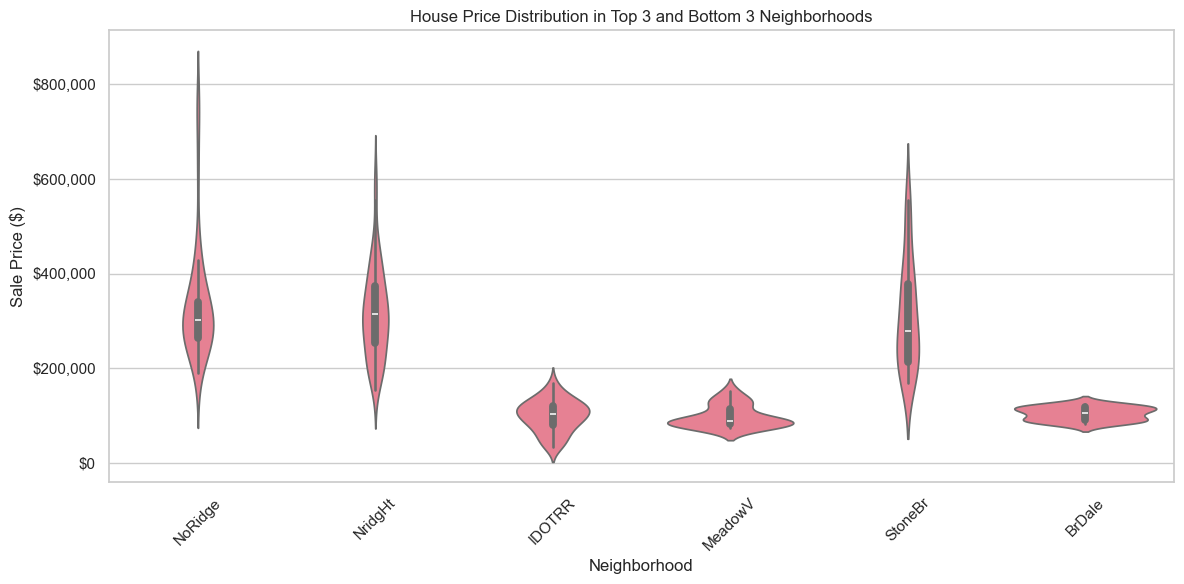

In [5]:
# Get the names of top 3 and bottom 3 neighborhoods
top_3 = df.groupby('Neighborhood')['SalePrice'].mean().nlargest(3).index
bottom_3 = df.groupby('Neighborhood')['SalePrice'].mean().nsmallest(3).index

# Create a dataframe with just these neighborhoods
plot_data = df[df['Neighborhood'].isin(list(top_3) + list(bottom_3))]

# Create violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=plot_data, x='Neighborhood', y='SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('House Price Distribution in Top 3 and Bottom 3 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price ($)')

# Format y-axis to show dollars in thousands
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

[0]	validation_0-rmse:70983.77184	validation_1-rmse:81113.84229
[1]	validation_0-rmse:65401.84057	validation_1-rmse:75360.45231
[2]	validation_0-rmse:60379.02217	validation_1-rmse:70176.74736
[3]	validation_0-rmse:55873.85335	validation_1-rmse:65601.00222
[4]	validation_0-rmse:51828.22316	validation_1-rmse:61356.34762
[5]	validation_0-rmse:48226.32283	validation_1-rmse:57626.72024
[6]	validation_0-rmse:44951.84082	validation_1-rmse:54201.53993
[7]	validation_0-rmse:41986.88041	validation_1-rmse:50991.18594
[8]	validation_0-rmse:39295.61773	validation_1-rmse:48396.23870
[9]	validation_0-rmse:36936.18142	validation_1-rmse:46058.80394
[10]	validation_0-rmse:34811.28610	validation_1-rmse:43937.94901
[11]	validation_0-rmse:32893.45483	validation_1-rmse:41976.11201
[12]	validation_0-rmse:31225.75354	validation_1-rmse:40421.93968
[13]	validation_0-rmse:29707.66840	validation_1-rmse:38930.80442
[14]	validation_0-rmse:28357.24743	validation_1-rmse:37692.92697
[15]	validation_0-rmse:27043.24475	

<Figure size 1000x600 with 0 Axes>

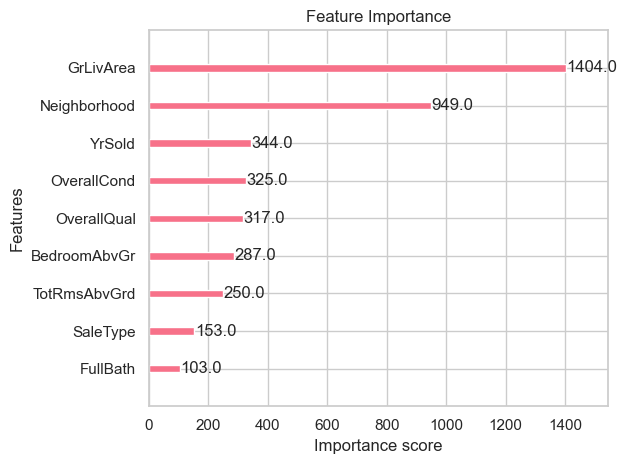

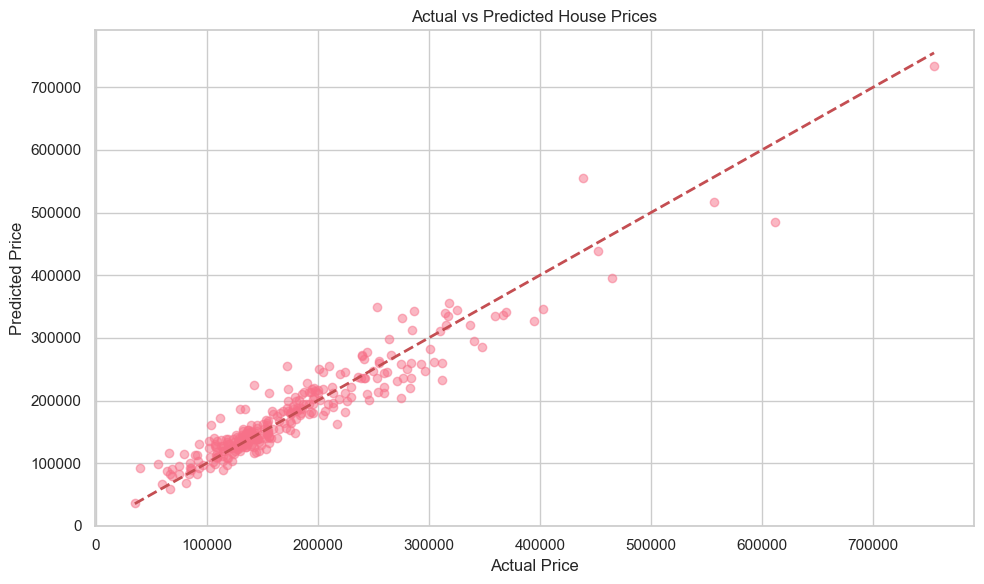

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the features we want to use
features = [
    'GrLivArea', 
    'BedroomAbvGr',
    'OverallQual',
    'OverallCond',
    'Neighborhood',
    'FullBath',
    'TotRmsAbvGrd',
    'YrSold',
    'SaleType'
]

# Create our feature matrix X and target variable y
X = df[features].copy()
y = df['SalePrice']

# Convert categorical features to 'category' dtype
X['Neighborhood'] = X['Neighborhood'].astype('category')
X['SaleType'] = X['SaleType'].astype('category')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create XGBoost model with parameters
params = {
    'tree_method': 'hist',
    'enable_categorical': True,
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 6,
    'random_state': 42,
    'eval_metric': 'rmse'  # moved here from fit() parameters
}

model = xgb.XGBRegressor(**params)

# Fit the model
model.fit(
    X_train, 
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

# Feature importance plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=len(features))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Actual vs predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive